# INSTALL

In [ ]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib
# !pip list
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# remove dodgy images

In [ ]:
import cv2
import imghdr

/tmp/ipython-input-4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
data_dir = 'drive/MyDrive/imageprocessing/dl-classifier-any-image/data'

In [ ]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir, 'happy'))

['1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '6186015_stock-photo-happy-people-crowd.jpg',
 '53-536005_people-clipart-happy-cartoon-transparent-happy-person-clipart.png',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '360_F_261529596_YZWJaMnYFSCM0FSCrxs71o6RrZ9MpP4D.jpg',
 '05-12-21-happy-people.jpg',
 '360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg',
 '2983960_stock-photo-happy-people.jpg',
 '35438_hd.jpg',
 '360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '65df254481d4ddd0c527a642_10-Common-Traits-Among-Happy-People-1.jpeg',
 '0-truly-happy-people.jpg',
 'image62.jpeg',
 'happy-people3.jpg',
 'image40.jpeg',
 'image3.jpeg',
 'image64.jpeg',
 'Happy.jpg',
 'Happy-people.png',
 'Happy_People_A_Year_in_the_Taiga_poster.jpg',
 'image41.jpeg',
 'image20.jpeg',
 'image50.jpeg',
 'image56.jpeg',
 'image66.jpeg',
 'image29.jpeg',
 'image65.jpeg',
 '4-things-happy-people-dont-do-cover.png',
 'image33.jpeg',
 'image28.jpeg',
 'image53.jpeg',
 'image49.jpeg',
 'image59.j

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg
6186015_stock-photo-happy-people-crowd.jpg
53-536005_people-clipart-happy-cartoon-transparent-happy-person-clipart.png
4239f3d51d092f69d529f372a37b4601.jpg
360_F_261529596_YZWJaMnYFSCM0FSCrxs71o6RrZ9MpP4D.jpg
05-12-21-happy-people.jpg
360_F_237330799_fynB7PDF8qXuq2qYTEKOa6E0Lt8Vbzv6.jpg
2983960_stock-photo-happy-people.jpg
35438_hd.jpg
360_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg
65df254481d4ddd0c527a642_10-Common-Traits-Among-Happy-People-1.jpeg
0-truly-happy-people.jpg
image62.jpeg
happy-people3.jpg
image40.jpeg
image3.jpeg
image64.jpeg
Happy.jpg
Happy-people.png
Happy_People_A_Year_in_the_Taiga_poster.jpg
image41.jpeg
image20.jpeg
image50.jpeg
image56.jpeg
image66.jpeg
image29.jpeg
image65.jpeg
4-things-happy-people-dont-do-cover.png
image33.jpeg
image28.jpeg
image53.jpeg
image49.jpeg
image59.jpeg
happy_1_1678616873966_1678616915228_1678616915228.jpg
image60.jpeg
image58.jpeg
image51.jpeg
happypeople-1024x679.jpg
happy-pe

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'happy', '_happy_jumping_on_beach-40815.jpg'))

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(675, 1200, 3)

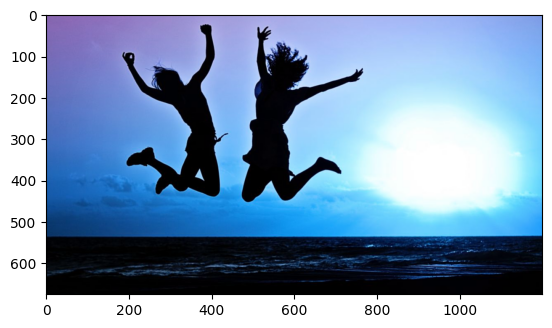

In [ ]:
plt.imshow(img)

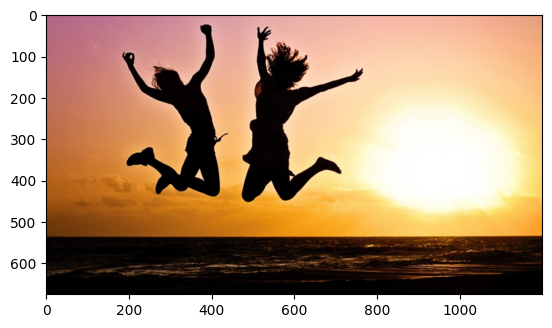

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

1.3 LOAD DATA

In [ ]:
tf.data.Dataset??
#tf.data.Dataset.list_files

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
data

Found 187 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# eğer ki bilgisayar yetersiz gelirse falan
#tf.keras.utils.image_dataset_from_directory(data_dir, batch_size=8, image_size=(128,128))

In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[0]

array([[[[2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         ...,
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02]],

        [[2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         ...,
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02]],

        [[2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         ...,
         [2.47000000e+02, 2.47000000e+02, 2.47000000e+02],
         [

In [ ]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
batch[1].shape

(32,)

In [ ]:
len(batch) #images and labels

2

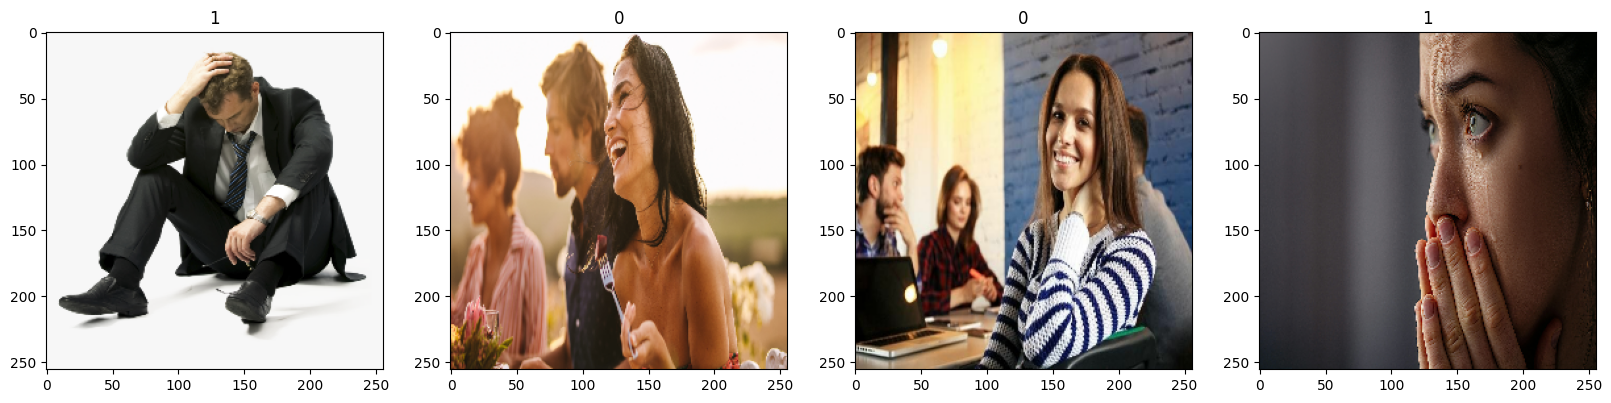

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. SCALE DATA

In [ ]:
batch[0].max()

np.float32(255.0)

In [ ]:
batch[0].min()

np.float32(0.0)

In [ ]:
scaled = batch[0] / 255

In [ ]:
scaled.min()

np.float32(0.0)

In [ ]:
scaled.max()

np.float32(1.0)

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].max()

np.float32(1.0)

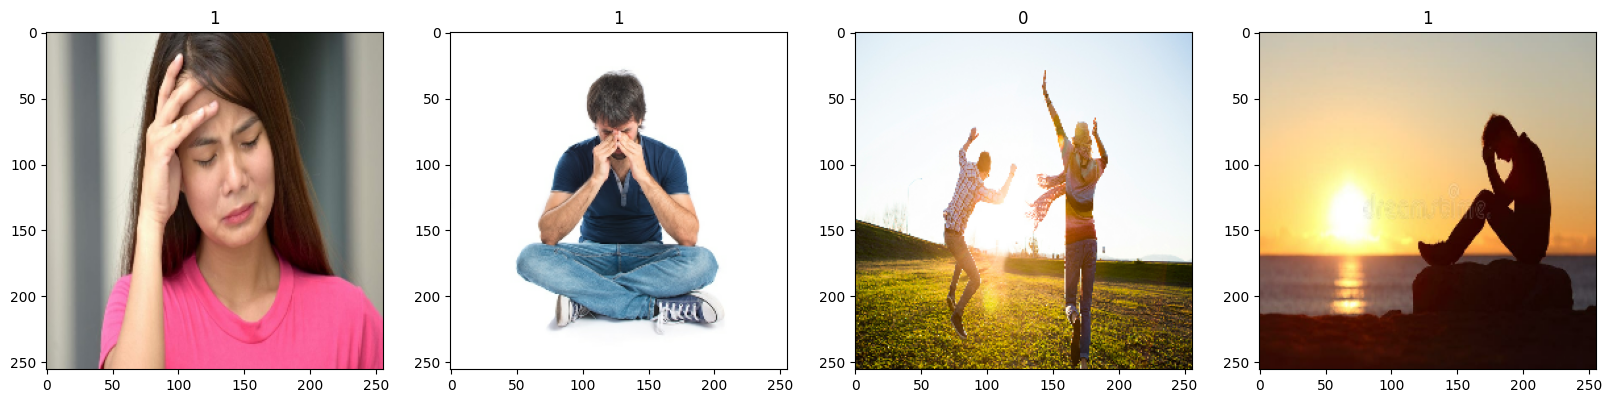

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 5. Split Data

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [ ]:
train_size

4

In [ ]:
val_size

1

In [ ]:
test_size

1

In [ ]:
len(data) == train_size + val_size + test_size

True

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model


In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5188 - loss: 1.4369 - val_accuracy: 0.6875 - val_loss: 0.6117
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 690ms/step - accuracy: 0.6635 - loss: 0.6394 - val_accuracy: 0.7188 - val_loss: 0.5109
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 688ms/step - accuracy: 0.6417 - loss: 0.6037 - val_accuracy: 0.8750 - val_loss: 0.5662
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 627ms/step - accuracy: 0.8865 - loss: 0.5346 - val_accuracy: 0.8125 - val_loss: 0.4518
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 647ms/step - accuracy: 0.7625 - loss: 0.4729 - val_accuracy: 0.8750 - val_loss: 0.4105
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8260 - loss: 0.4228 - val_accuracy: 0.6875 - val_loss: 0.5219
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 757ms/step - accuracy: 0.8281 - loss: 0.3175 - val_accuracy: 0.8750 - val_loss: 0.3693
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9208 - loss: 0.2167 - val_accuracy: 0.9375 - val_loss: 0.1625


# 8. Plot Performance


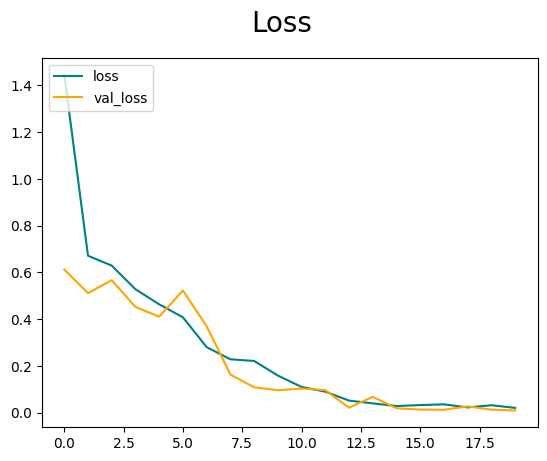

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

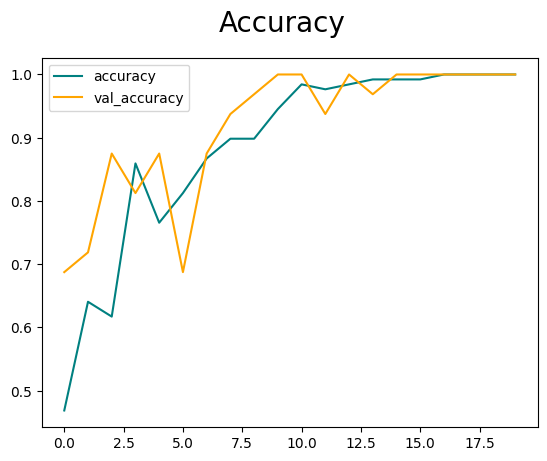

In [ ]:


fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()



# 9. Evaluate


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:


pre = Precision()
re = Recall()
acc = BinaryAccuracy()



In [ ]:


for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step


In [ ]:


print(pre.result(), re.result(), acc.result())



tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [ ]:
import cv2

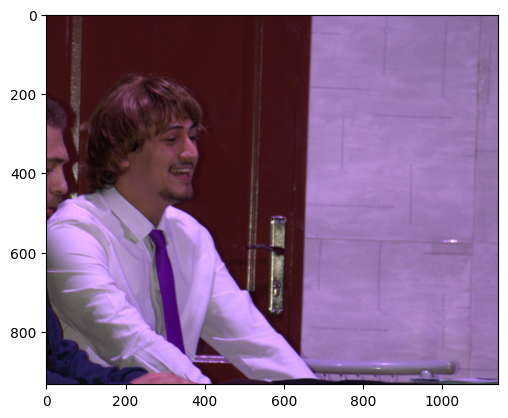

In [ ]:
img = cv2.imread('drive/MyDrive/imageprocessing/dl-classifier-any-image/mutlu_kaan.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

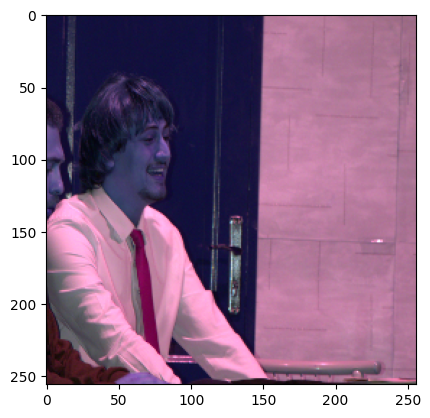

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [ ]:
yhat

array([[0.2527598]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is BEDBAHT')
else:
    print(f'Predicted class is Mutlu')

Predicted class is Mutlu


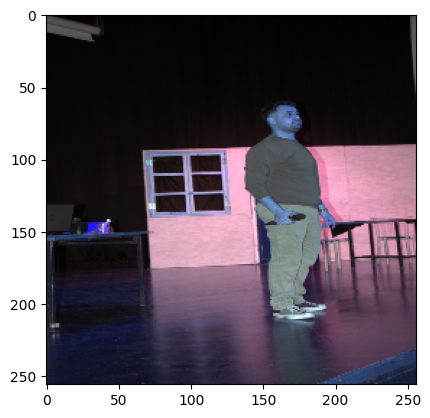

In [ ]:
img2 = cv2.imread('drive/MyDrive/imageprocessing/dl-classifier-any-image/sad_mimik_adam.png')
resize2 = tf.image.resize(img2, (256,256))
plt.imshow(resize2.numpy().astype(int))
plt.show()

In [ ]:
yhat2 = model.predict(np.expand_dims(resize2/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [ ]:
if yhat2 > 0.5:
    print(f'Predicted class is BEDBAHT')
else:
    print(f'Predicted class is MUTLU')

Predicted class is BEDBAHT
